In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
palette = {
    "MYH7+_young": "#073E7F",
    "MYH7+_aged": "#83A0BE",
    "MYH2+_young": "#F49600",
    "MYH2+_aged": "#F9CB80",
    "MYH2⁺2+_young": "#866AA3",
    "MYH2⁺2+_aged": "#C1B7CF",
    "MYH1+_young": "#BE0E23",
    "MYH1+_aged": "#E18791"
}


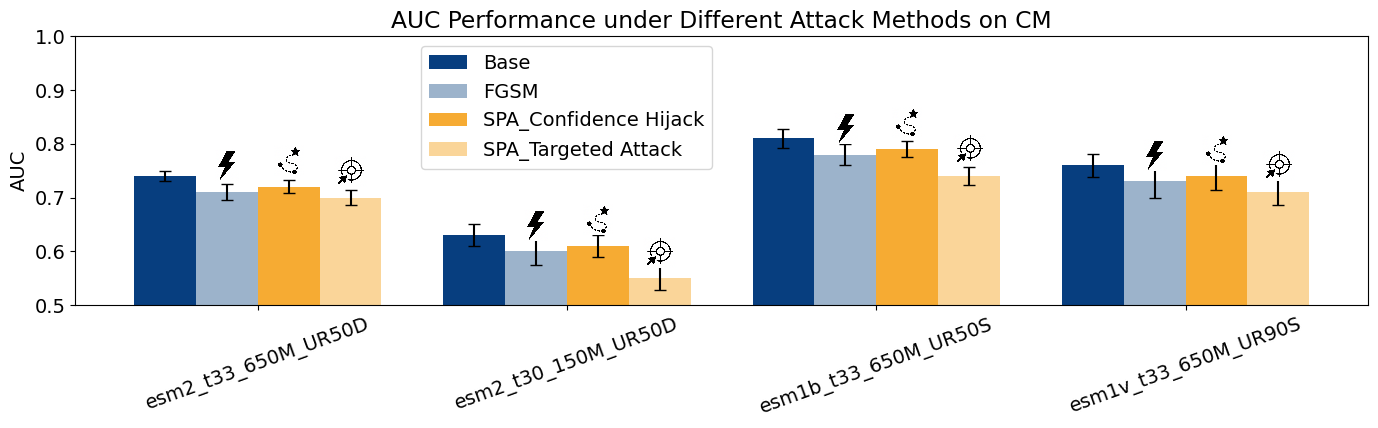

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define model names and attack methods
models = ['esm2_t33_650M_UR50D', 'esm2_t30_150M_UR50D', 'esm1b_t33_650M_UR50S', 'esm1v_t33_650M_UR90S']
methods = ['Base', 'FGSM', 'SPA_Confidence Hijack', 'SPA_Targeted Attack']

# AUC_CM values
auc_values = [
    [0.74, 0.71, 0.72, 0.7],
    [0.63, 0.6, 0.61, 0.55],
    [0.81, 0.78, 0.79, 0.74],
    [0.76, 0.73, 0.74, 0.71]
]
auc_errors = [
    [0.01, 0.015, 0.012, 0.014],  # Base
    [0.02, 0.025, 0.02, 0.022],   # FGSM
    [0.018, 0.02, 0.015, 0.017],  # SPA_Confidence Hijack
    [0.022, 0.03, 0.025, 0.024]   # SPA_Targeted attack
]

# Load icons
icon_paths = [
    "/content/drive/My Drive/vep_FGSM/data/Screenshot 2025-05-12 at 3.47.46 PM.png",  # Confidence Hijack
    "/content/drive/My Drive/vep_FGSM/data/Screenshot 2025-05-12 at 3.47.49 PM.png",  # FGSM
    "/content/drive/My Drive/vep_FGSM/data/Screenshot 2025-05-12 at 3.47.53 PM.png"   # Targeted Attack
]
icons = [mpimg.imread(path) for path in icon_paths]

# Custom color palette
palette = {
    "Base": "#073E7F",  # MYH7+_young
    "FGSM": "#83A0BE",  # MYH7+_aged
    "SPA_Confidence Hijack": "#F49600",  # MYH2+_young
    "SPA_Targeted Attack": "#F9CB80",  # MYH2+_aged
}

# Helper function to add an icon to a bar
def add_icon(ax, x, y, icon, zoom=0.03):
    imagebox = OffsetImage(icon, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, box_alignment=(0.5, 0))
    ax.add_artist(ab)

# Create the bar plot
bar_width = 0.2
x = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 4.5))

# Plot bars for each method
for i, method in enumerate(methods):
    color = palette.get(method, 'gray')
    alpha_val = 1.0 if method == 'Base' else 0.8
    heights = [auc[i] for auc in auc_values]
    errors = [err[i] for err in auc_errors]
    #bars = ax.bar(x + i * bar_width - 1.5 * bar_width, [auc[i] for auc in auc_values],
    #              bar_width, label=method, color=color, alpha=alpha_val)
    bars = ax.bar(
        x + i * bar_width - 1.5 * bar_width,
        heights,
        yerr=errors,
        capsize=4,
        width=bar_width,
        label=method,
        color=color,
        alpha=alpha_val
    )

    # Add corresponding icons
    if method == 'FGSM':
        for j, bar in enumerate(bars):
            add_icon(ax, bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, icons[1])
    elif method == 'SPA_Confidence Hijack':
        for j, bar in enumerate(bars):
            add_icon(ax, bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, icons[0])
    elif method == 'SPA_Targeted Attack':
        for j, bar in enumerate(bars):
            add_icon(ax, bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, icons[2])

# Plot settings
#ax.set_xlabel('Models')
plt.rcParams.update({'font.size': 14})
ax.set_ylabel('AUC')
ax.set_title('AUC Performance under Different Attack Methods on CM')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_ylim(0.5, 1.0)
ax.legend(loc='upper center', bbox_to_anchor=(0.38, 1.0))
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig4i_cm_auc.png", dpi=300)
plt.show()


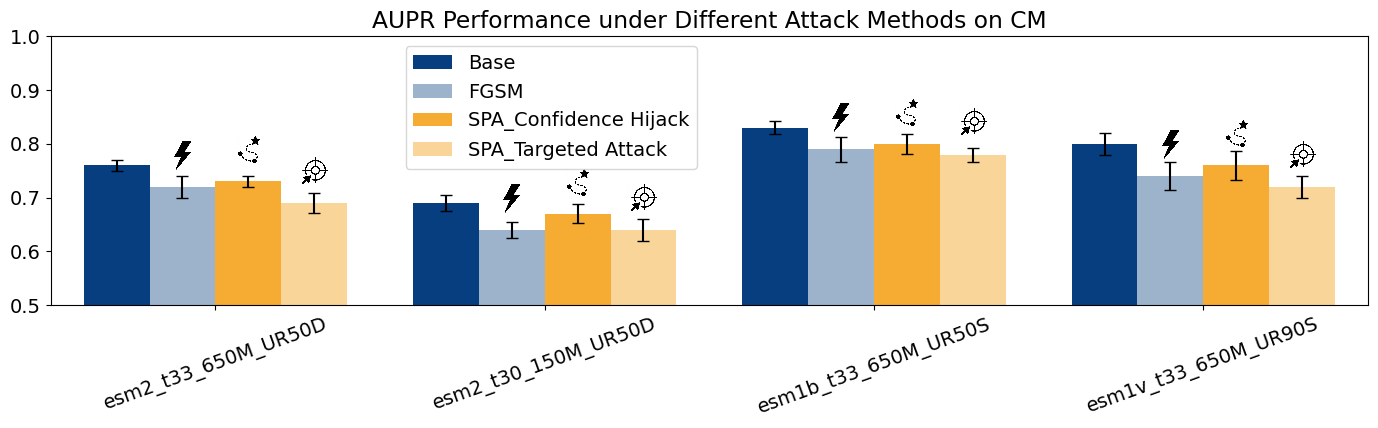

In [50]:
aupr_cm_values = [
    [0.76, 0.72, 0.73, 0.69],
    [0.69, 0.64, 0.67, 0.64],
    [0.83, 0.79, 0.80, 0.78],
    [0.80, 0.74, 0.76, 0.72]
]
#aupr_cm_errors = [[0.01]*4]*4  # Replace with real errors if available
aupr_cm_errors = [
    [0.01, 0.020, 0.010, 0.019],  # Base
    [0.015, 0.015, 0.018, 0.020],   # FGSM
    [0.012, 0.023, 0.019, 0.013],  # SPA_Confidence Hijack
    [0.020, 0.026, 0.027, 0.020]   # SPA_Targeted attack
]
fig, ax = plt.subplots(figsize=(14, 4.5))
for i, method in enumerate(methods):
    color = palette[method]
    alpha_val = 1.0 if method == 'Base' else 0.8
    heights = [row[i] for row in aupr_cm_values]
    errors = [row[i] for row in aupr_cm_errors]
    bars = ax.bar(x + i*bar_width - 1.5*bar_width, heights, yerr=errors, capsize=4, width=bar_width, color=color, alpha=alpha_val, label=method)
    if method == 'FGSM':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, icons[1])
    elif method == 'SPA_Confidence Hijack':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, icons[0])
    elif method == 'SPA_Targeted Attack':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.03, icons[2])
plt.rcParams.update({'font.size': 14})
ax.set_title('AUPR Performance under Different Attack Methods on CM')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_xlim(-0.5, len(models) - 0.5)
ax.set_ylim(0.5, 1.0)
ax.legend(loc='upper center', bbox_to_anchor=(0.38, 1.0))
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig4j_cm_aupr.png", dpi=300)
plt.show()


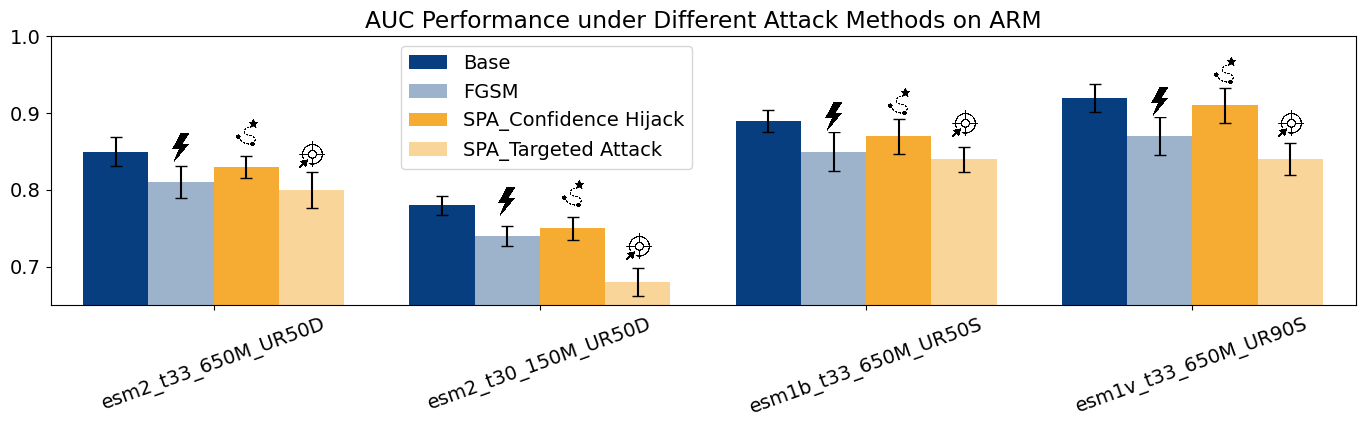

In [52]:
auc_arm_values = [
    [0.85, 0.81, 0.83, 0.80],
    [0.78, 0.74, 0.75, 0.68],
    [0.89, 0.85, 0.87, 0.84],
    [0.92, 0.87, 0.91, 0.84]
]
#auc_arm_errors = [[0.01]*4]*4
auc_arm_errors = [
    [0.019, 0.021, 0.014, 0.023],  # Base
    [0.012, 0.013, 0.015, 0.018],   # FGSM
    [0.014, 0.025, 0.023, 0.016],  # SPA_Confidence Hijack
    [0.018, 0.025, 0.023, 0.021]   # SPA_Targeted attack
]
fig, ax = plt.subplots(figsize=(14, 4.5))
for i, method in enumerate(methods):
    color = palette[method]
    alpha_val = 1.0 if method == 'Base' else 0.8
    heights = [row[i] for row in auc_arm_values]
    errors = [row[i] for row in auc_arm_errors]
    bars = ax.bar(x + i*bar_width - 1.5*bar_width, heights, yerr=errors, capsize=4, width=bar_width, color=color, alpha=alpha_val, label=method)
    if method == 'FGSM':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.025, icons[1])
    elif method == 'SPA_Confidence Hijack':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.025, icons[0])
    elif method == 'SPA_Targeted Attack':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.025, icons[2])
plt.rcParams.update({'font.size': 14})
ax.set_title('AUC Performance under Different Attack Methods on ARM')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_xlim(-0.5, len(models) - 0.5)
ax.set_ylim(0.65, 1.0)
ax.legend(loc='upper center', bbox_to_anchor=(0.38, 1.0))
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig4k_arm_auc.png", dpi=300)
plt.show()


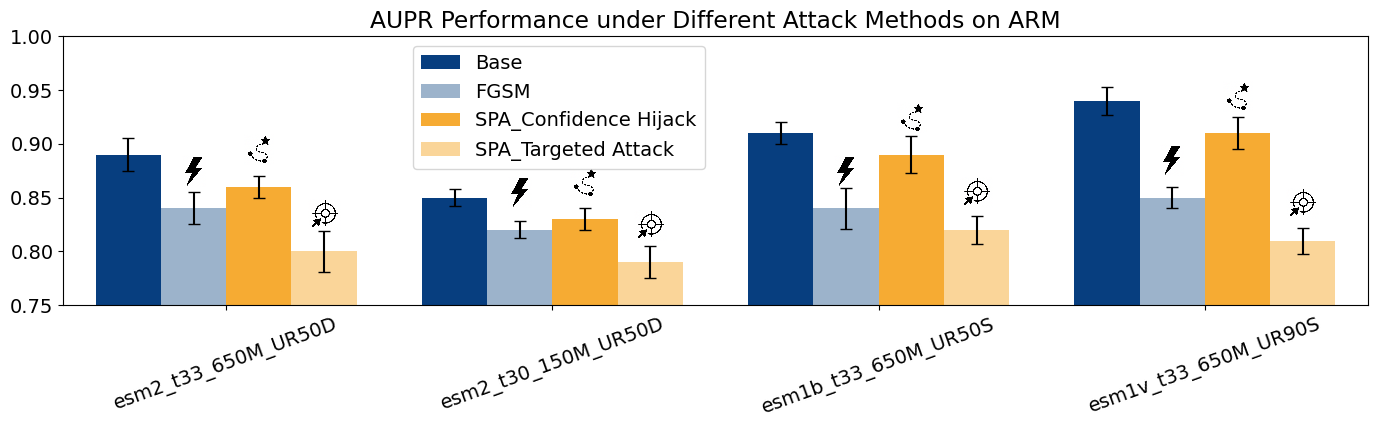

In [53]:
aupr_arm_values = [
    [0.89, 0.84, 0.86, 0.80],
    [0.85, 0.82, 0.83, 0.79],
    [0.91, 0.84, 0.89, 0.82],
    [0.94, 0.85, 0.91, 0.81]
]
#aupr_arm_errors = [[0.01]*4]*4
aupr_arm_errors = [
    [0.015, 0.015, 0.010, 0.019],  # Base
    [0.008, 0.008, 0.010, 0.015],   # FGSM
    [0.010, 0.019, 0.017, 0.013],  # SPA_Confidence Hijack
    [0.013, 0.010, 0.015, 0.012]   # SPA_Targeted attack
]

fig, ax = plt.subplots(figsize=(14, 4.5))
for i, method in enumerate(methods):
    color = palette[method]
    alpha_val = 1.0 if method == 'Base' else 0.8
    heights = [row[i] for row in aupr_arm_values]
    errors = [row[i] for row in aupr_arm_errors]
    bars = ax.bar(x + i*bar_width - 1.5*bar_width, heights, yerr=errors, capsize=4, width=bar_width, color=color, alpha=alpha_val, label=method)
    if method == 'FGSM':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, icons[1])
    elif method == 'SPA_Confidence Hijack':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, icons[0])
    elif method == 'SPA_Targeted Attack':
        for j, bar in enumerate(bars): add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, icons[2])
plt.rcParams.update({'font.size': 14})
ax.set_title('AUPR Performance under Different Attack Methods on ARM')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=20)
ax.set_xlim(-0.5, len(models) - 0.5)
ax.set_ylim(0.75, 1.0)
ax.legend(loc='upper center', bbox_to_anchor=(0.38, 1.0))
plt.tight_layout()
plt.savefig("/content/drive/My Drive/vep_FGSM/output/fig4l_arm_aupr.png", dpi=300)
plt.show()


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define labels
ft_labels = ['esm2_t33_650M_UR50D', 'esm2_t30_150M_UR50D', 'esm1b_t33_650M_UR50S', 'esm1v_t33_650M_UR90S']
ft_methods = ['Base', 'FGSM']
bar_width = 0.3
x = np.arange(len(ft_labels))

# Define purple-themed palette
ft_palette = {
    "Base": "#866AA3",  # MYH2⁺2+_young
    "FGSM": "#C1B7CF",  # MYH2⁺2+_aged
}

# Load icons
icon_paths = [
    "/content/drive/My Drive/vep_FGSM/data/Screenshot 2025-05-12 at 3.47.46 PM.png",  # Confidence Hijack
    "/content/drive/My Drive/vep_FGSM/data/Screenshot 2025-05-12 at 3.47.49 PM.png",  # FGSM
    "/content/drive/My Drive/vep_FGSM/data/Screenshot 2025-05-12 at 3.47.53 PM.png"   # Targeted Attack
]
icons = [mpimg.imread(path) for path in icon_paths]

# Helper to add icons
def add_icon(ax, x, y, icon, zoom=0.05):
    imagebox = OffsetImage(icon, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, box_alignment=(0.5, 0))
    ax.add_artist(ab)

# Data: [model][method]
ft_auc_cm = [
    [0.83, 0.79], [0.77, 0.72], [0.90, 0.83], [0.86, 0.81]
]
ft_aupr_cm = [
    [0.84, 0.80], [0.82, 0.71], [0.85, 0.79], [0.83, 0.76]
]
ft_auc_arm = [
    [0.91, 0.83], [0.88, 0.82], [0.96, 0.86], [0.92, 0.85]
]
ft_aupr_arm = [
    [0.84, 0.75], [0.81, 0.75], [0.85, 0.76], [0.84, 0.78]
]

def plot_ft_metric(data, title):
    fig, ax = plt.subplots(figsize=(10, 4.5))
    for i, method in enumerate(ft_methods):
        color = ft_palette[method]
        alpha_val = 1.0 if method == 'Base' else 0.8
        heights = [row[i] for row in data]
        bars = ax.bar(
            x + i*bar_width - 0.5*bar_width,
            heights,
            width=bar_width,
            label=method,
            color=color,
            alpha=alpha_val
        )
        # Add icon to FGSM bars
        if method == 'FGSM':
            for j, bar in enumerate(bars):
                add_icon(ax, bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, icons[1], zoom=0.05)

    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(ft_labels, rotation=20)
    ax.set_xlim(-0.5, len(ft_labels) - 0.5)
    ax.set_ylim(0.5, 1.0)
    ax.legend(loc='lower right')
    plt.rcParams.update({'font.size': 14})
    plt.tight_layout()
    # Save the figure
    filename = title.lower().replace(" ", "_").replace("-", "").replace("__", "_") + ".png"
    save_path = "/content/drive/My Drive/vep_FGSM/output/" + filename

    # Save the figure
    plt.savefig(save_path, dpi=300)
    plt.show()


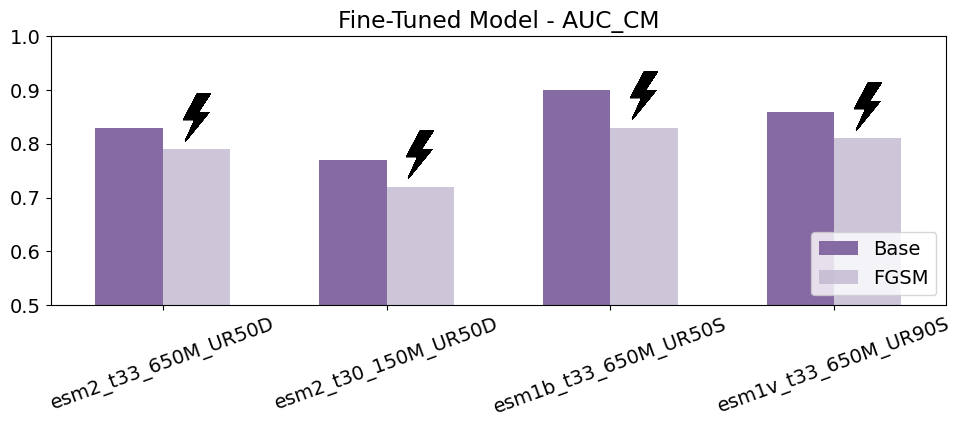

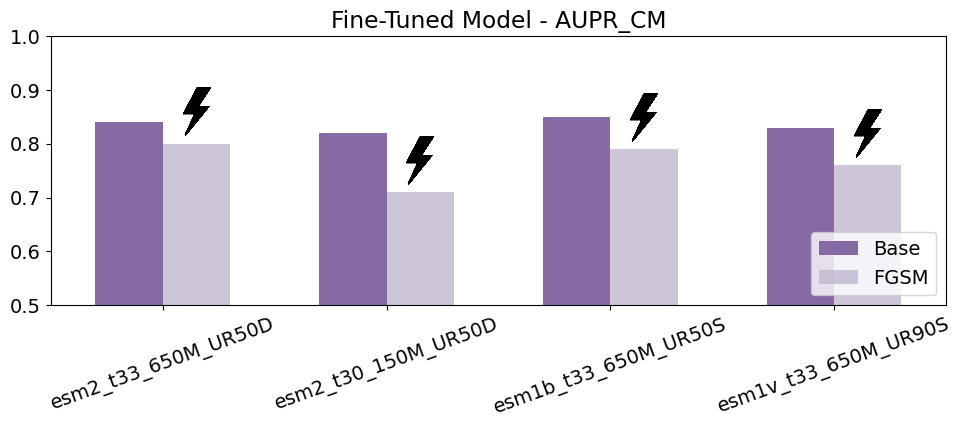

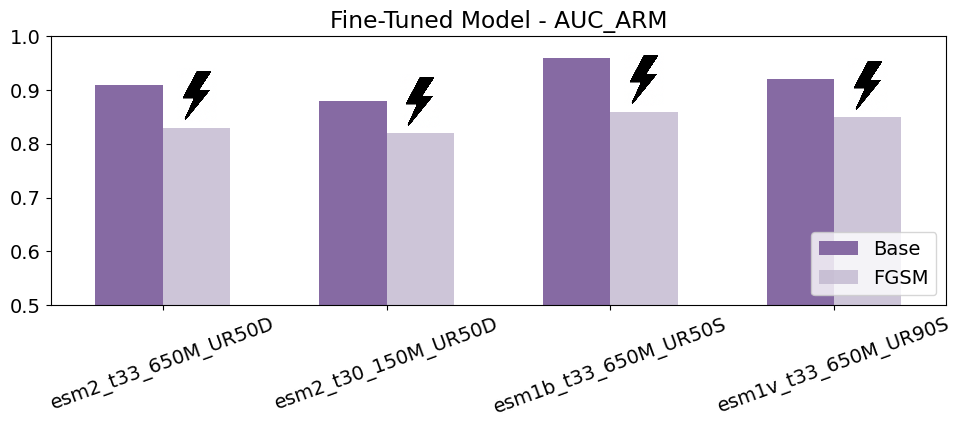

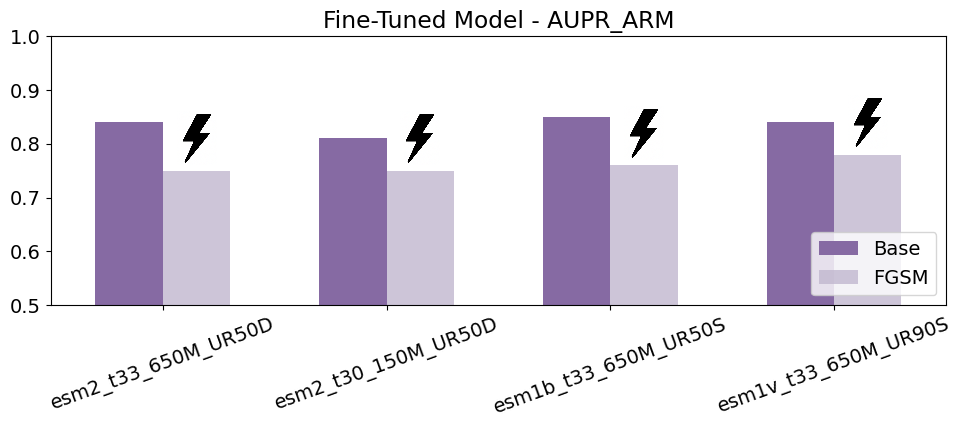

In [63]:
plot_ft_metric(ft_auc_cm, "Fine-Tuned Model - AUC_CM")
plot_ft_metric(ft_aupr_cm, "Fine-Tuned Model - AUPR_CM")
plot_ft_metric(ft_auc_arm, "Fine-Tuned Model - AUC_ARM")
plot_ft_metric(ft_aupr_arm, "Fine-Tuned Model - AUPR_ARM")
